# Dev Tests of Simulation

In [1]:
import numpy as np
from brian2 import *
from brian2tools import *

WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]


In [2]:
s = Simulation()
rts = RuntimeSimulation()
sas = CPPStandaloneSimulation()

## Set up network

In [3]:
model = Equations('''
    I = g*(v-E) : amp
    v = 10*mvolt :volt
    g : siemens (constant)
    E : volt (constant)
    ''')

dt = 0.1 *ms
defaultclock.dt = dt

neurons = NeuronGroup(1, model, name='neurons')
monitor = StateMonitor(neurons, 'I', record=True, name='monitor')

net = Network(neurons, monitor)
rts.initialize(net)

rts.run(10*ms, {'g': 100, 'E':10}, ['g', 'E'])

In [4]:
isinstance(rts.network, Network)

True

In [5]:
I = getattr(rts.network['monitor'], 'I')

In [6]:
I.shape

(1, 100)

In [7]:
10 / 0.1

100.0

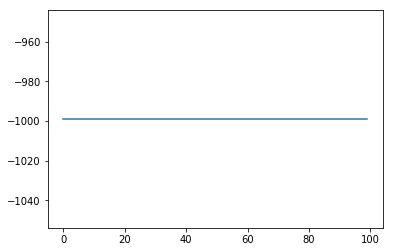

In [8]:
plot(I.transpose());

In [10]:
dt = 0.1 * ms
duration = 10 * ms
defaultclock.dt = dt

In [12]:
start_scope()

neurons = NeuronGroup(1, model, name='neurons')
monitor = StateMonitor(neurons, 'I', record=True, name='monitor')
net = Network(neurons, monitor)

device.has_been_run = False
sas = CPPStandaloneSimulation()
sas.initialize(net)

sas.run(duration, {'g': 100, 'E': 10}, ['g', 'E'])
I = getattr(sas.network['monitor'], 'I')


WARNING    Active device does not have an attribute 'static_array', ignoring this [brian2.devices.device]
WARNING    Active device does not have an attribute 'main_queue', ignoring this [brian2.devices.device]
WARNING    Active device does not have an attribute 'static_array', ignoring this [brian2.devices.device]
WARNING    Active device does not have an attribute 'main_queue', ignoring this [brian2.devices.device]


{'g': <brian2.devices.device.Dummy object at 0x7fad18e31278>, 'E': <brian2.devices.device.Dummy object at 0x7fad18e88c88>}


In [13]:
isinstance({'g':100}, dict)

True

In [14]:
from brian2tools.modelfitting.simulation import (initialize_neurons, initialize_parameter,
                                                 run_again, set_parameter_value, set_states)


In [15]:
initialize_parameter(neurons.__getattr__('g'), 100)

WARNING    Active device does not have an attribute 'static_array', ignoring this [brian2.devices.device]
WARNING    Active device does not have an attribute 'main_queue', ignoring this [brian2.devices.device]


In [18]:
net['neurons']

NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurons')

In [22]:
empty_net = Network()
rts = RuntimeSimulation()
rts.initialize(empty_net)
rts.network['neurons']

KeyError: 'No object with name "neurons" found'